# Temirlan Kaiyrbekov First Pet Project using SQL through the bigquery library and matplotlib
## Finished on 20/12/2021

### This notebook is written in Kaggle. It has bigquery system integrated, so there are no needs to pre-install bigquery library. Using it is more tedious for Jupyter or Google Colab.

### First of all, the two following libraries should be imported to clean and transform data, and plot graph using dataframe that we get in the process

In [1]:
from google.cloud import bigquery

In [2]:
import matplotlib.pyplot as plt

### Definition of the "client" object that will contain "bigquery-public-data" project

In [3]:
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


### Next, a reference to a dataset "chicago_taxi_trips" that will be contained inside of my project is created

In [4]:
dataset_ref = client.dataset("chicago_taxi_trips", project = "bigquery-public-data")

### A "dataset" variable is created that will get the dataset pointed by the reference

In [5]:
dataset = client.get_dataset(dataset_ref)

### The next few lines show that my dataset contains only one table "taxi_trips

In [6]:
tables = list(client.list_tables(dataset))
for i in tables:
    print(i.table_id)

taxi_trips


### As with the dataset, table variable gets the information of "taxi_trips" table through referencing. Then, its first five rows are showed

In [7]:
table_ref = dataset_ref.table("taxi_trips")
table = client.get_table(table_ref)
# The command below outputs the first five rows converted to a pandas dataframe
client.list_rows(table, max_results = 5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  after removing the cwd from sys.path.


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
1,6d5b6e5f3e5397f08e770beeb5f34433b0491d12,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-08-01 21:45:00+00:00,2014-08-01 21:45:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,8.45,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
2,980c986313ec13a9d59412826c83bfa65e01d0c3,60e9b32a85d0045d670d329891f51b9796543659769e9a...,2014-08-01 18:45:00+00:00,2014-08-01 18:45:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,8.05,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
3,29aea409062ff5c29c33fecff902acd8e58e5e0f,73f6888d8d8f9808f6624377edfa1e2a0a574b06eafbc9...,2014-07-31 09:45:00+00:00,2014-07-31 09:45:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,12.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
4,e83f8835694883f25c11fc70bdf8443b5c68448f,55af2e70fd4624a43fea70121974c54db44c8e7582ce3d...,2014-07-16 08:45:00+00:00,2014-07-16 08:45:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,1.0,4.25,Cash,Blue Ribbon Taxi Association Inc.,NaN,NaN,None,NaN,NaN,None


### Then, a "ridesperyear" SQL query is initiated. It groups rows by "year" variable that we extract from the "trip_start_timestamp" column. Also, it counts the number of trips, thus, giving us a table of taxi trips that were made in every year in Chicago.

In [8]:
ridesperyear = """
                SELECT EXTRACT(YEAR FROM trip_start_timestamp) as year, COUNT(1) as num_trips
                FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                GROUP BY year
                ORDER BY year
"""
# The two lines below limit the memory usage of the query to 10^10 bytes (10 GB).
# In case the limit is exceeded, it will output an error warning.
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = 10**10)
ridesperyear_query_job = client.query(ridesperyear, job_config = safe_config)

ridesperyear_result = ridesperyear_query_job.to_dataframe()
print(ridesperyear_result)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


   year  num_trips
0  2013   27217716
1  2014   37395436
2  2015   32385875
3  2016   31759339
4  2017   24988003
5  2018   20732088
6  2019   16477365
7  2020    3889032
8  2021    3948019
9  2022         30


### It can be seen that, in general patterns, number of trips per every year do not vary much except for the last two years. However, it is best shown in a bar chart.

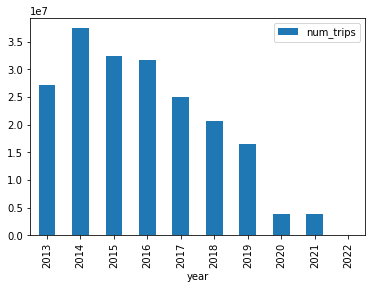

In [9]:
ridesperyear_result.plot(x ='year', y='num_trips', kind = 'bar')
plt.show()

### It is seen that the last two years show a dramatic decrease in the number of taxi trips. From these data, we can hypothesize that COVID-19 might be the prima facie reason for such a sharp change. However, this hypothesis is made based only on the correlation. Its proof would need a different kind of research.

### From the given data, we can also find out the distribution of average speeds and number of trips during a day in the first half of the 2017 year. The following query uses WITH/AS syntax for convenience. It outputs a table with three columns (hour_of_day [0-23], num_trips, avg_mph). The latter is calculated by using an aggregate function SUM: it divides the sum of the trip miles by the sum of trip seconds and multiplies all by 3600 to give average miles per hour instead of seconds.

In [10]:
speeds_query = """
                WITH RelevantRides AS
                (
                    SELECT EXTRACT(HOUR FROM trip_start_timestamp) as hour_of_day,
                    trip_miles,
                    trip_seconds
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    WHERE
                        trip_start_timestamp > '2017-01-01' and
                        trip_start_timestamp < '2017-07-01' and
                        EXTRACT(YEAR FROM trip_start_timestamp)=2017 and
                        trip_seconds > 0 and
                        trip_miles > 0
                )
                SELECT hour_of_day, COUNT(1) as num_trips, 3600*SUM(trip_miles)/SUM(trip_seconds) as avg_mph
                FROM RelevantRides
                GROUP BY hour_of_day
                ORDER BY hour_of_day
"""

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = 10**10)
speeds_query_job = client.query(speeds_query, job_config = safe_config)

speeds_result = speeds_query_job.to_dataframe()
print(speeds_result)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


    hour_of_day  num_trips    avg_mph
0             0     319339  20.230524
1             1     266529  18.937621
2             2     210147  18.777070
3             3     159668  20.158048
4             4     122183  26.736014
5             5     119312  30.769172
6             6     182738  24.588313
7             7     358406  17.735967
8             8     541775  15.079892
9             9     565548  16.543882
10           10     525120  18.539614
11           11     594603  18.928379
12           12     622324  17.838745
13           13     630181  17.671089
14           14     622465  16.974239
15           15     640430  15.688418
16           16     701435  14.283888
17           17     756627  12.462955
18           18     768251  13.646810
19           19     701064  16.642882
20           20     598614  19.536777
21           21     552726  20.433874
22           22     501095  19.531374
23           23     399587  19.877046


### Again, for a better view, plots (num_trips VS hour_of_day) and (avg_miles VS hour_of_day) are constructed.

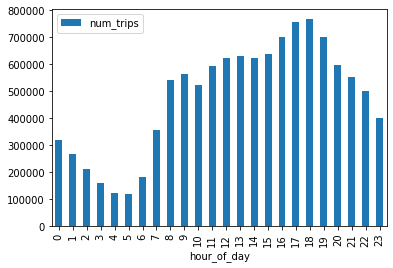

In [11]:
speeds_result.plot(x ='hour_of_day', y='num_trips', kind = 'bar')
plt.show()

### Interesting insights can be inferred from the above table. For instance, taxies are at their busiest towards evening. Also, the numbers starts to sharply rise towards 8 AM (probably because people call a taxi to get to the work). 

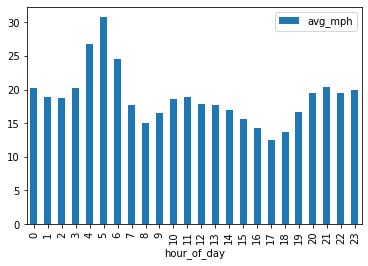

In [12]:
speeds_result.plot(x ='hour_of_day', y='avg_mph', kind = 'bar')
plt.show()

### The last plot does not show any exceptional variations in speed except for the very late morning time. If we look at the chart above it, there is a correlation in average speed and the number of trips in the late morning. A direct thought here is that the avg_mph is at its peak there because there are fewer taxies in the late morning. However, there might be a confounder as "number of vehicles in general", and there are generally more variables that affect avg_mph. I, personally, presume that many people are asleep in the late morning, so taxi drivers have more space on the road, and hence, can drive quicker.